# Perceptron dan ANN

## Praktikum 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Load dan Persiapan data

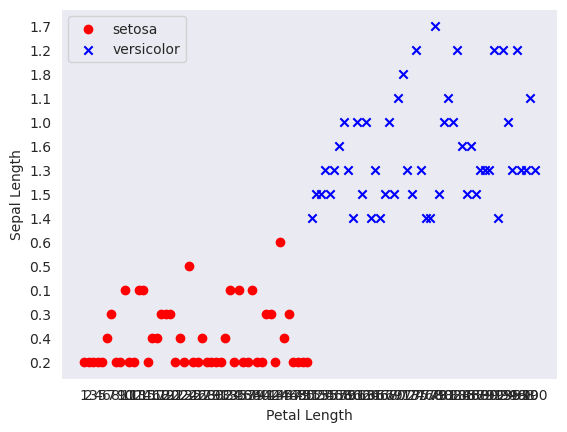

In [4]:
df = pd.read_csv('assets/Iris.csv', header=None)
setosa = df[df[5] == 'Iris-setosa']
versicolor = df[df[5] == 'Iris-versicolor']
virginica = df[df[5] == 'Iris-virginica']

a, b = 0, 4
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Membuat Kelas Perceptron

In [9]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Pilih Data dan Encoding Label

In [6]:
y = df.iloc[1:101, 5].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[1:101, [1, 4]].values

### Fitting Model

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X.astype(float), y)

### Visualisasi Nilai Error Per Epoch

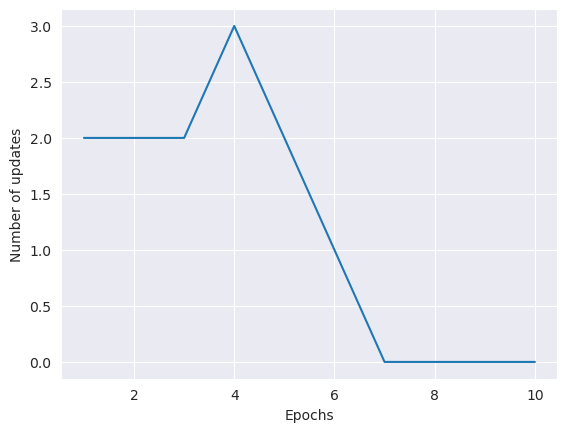

In [8]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Visualiasasi Decision Boundary

In [11]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=cmap(i), marker=markers[i], label=cl)

    plt.legend(loc='upper left')
    plt.show()

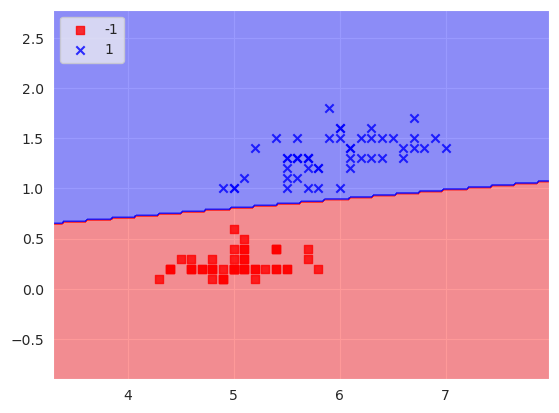

In [12]:
plot_decision_regions(X.astype(float), y, ppn)

## Praktikum 2

In [13]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

### Pilih Label dan Split Data

In [14]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

### Ekstrak Fitur dan Buat Model Perceptron

In [15]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



### Penjelasan

Dataset yang digunakan pada kode program diatas adalah `20newsgroup` yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan `tfidf-vectorizer`.

## Praktikum 3

In [16]:
from sklearn.neural_network import MLPClassifier

### Buat Data

In [17]:
y = [0, 1, 1, 0]  # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]]  # data

### Fit Model

In [18]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

### Prediksi

In [19]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i, p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


## Praktikum 4
Klasifikasi dengan ANN



In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf

2024-10-21 14:50:08.625316: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load Data

In [7]:
dataset = pd.read_csv('assets/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [8]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


### Encoding Data Kategori

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

### One Hot Encoding

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Split Data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Buat Model

In [13]:
ann = tf.keras.models.Sequential()

### Tambahkan Layer

In [16]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compile Model

In [17]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Fit Model

In [18]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.7992 - loss: 0.5862
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.7996 - loss: 0.4591
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.8019 - loss: 0.4445
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.8016 - loss: 0.4340
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.8084 - loss: 0.4226
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.8171 - loss: 0.4151
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.8150 - loss: 0.4145
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.8330 - loss: 0.3821
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.8474 - loss: 0.3690
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.8465 - loss: 0.3669
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.8516 - loss: 0.3614
Epoch 12/100
250/25

### Prediksi

In [19]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[False]]


In [20]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1506   89]
 [ 190  215]]


0.8605

## Tugas

In [52]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.17.0
3.4.1


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Load Data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape data
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

# One-hot encoding untuk label
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 4s 0us/step


### Buat Model

In [4]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


2024-10-21 15:10:58.214948: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-10-21 15:10:58.215605: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-10-21 15:11:04.486381: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-10-21 15:11:04.486421: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-10-21 15:11:04.487218: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024

### Fit Model

In [5]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    verbose=1)

2024-10-21 15:11:25.765226: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 169344000 exceeds 10% of free system memory.
2024-10-21 15:11:25.971937: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-10-21 15:11:25.972247: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3194105000 Hz


Epoch 1/20
422/422 [==============================] - 1s 2ms/step - loss: 0.8019 - accuracy: 0.7511 - val_loss: 0.1605 - val_accuracy: 0.9518
Epoch 2/20
422/422 [==============================] - 1s 1ms/step - loss: 0.2274 - accuracy: 0.9342 - val_loss: 0.1129 - val_accuracy: 0.9660
Epoch 3/20
422/422 [==============================] - 1s 1ms/step - loss: 0.1670 - accuracy: 0.9497 - val_loss: 0.0928 - val_accuracy: 0.9742
Epoch 4/20
422/422 [==============================] - 1s 1ms/step - loss: 0.1301 - accuracy: 0.9596 - val_loss: 0.0831 - val_accuracy: 0.9752
Epoch 5/20
422/422 [==============================] - 1s 1ms/step - loss: 0.1140 - accuracy: 0.9655 - val_loss: 0.0751 - val_accuracy: 0.9780
Epoch 6/20
422/422 [==============================] - 1s 1ms/step - loss: 0.0976 - accuracy: 0.9700 - val_loss: 0.0703 - val_accuracy: 0.9778
Epoch 7/20
422/422 [==============================] - 1s 1ms/step - loss: 0.0865 - accuracy: 0.9719 - val_loss: 0.0764 - val_accuracy: 0.9785
Epoch 

### Evaluasi Model

In [6]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9823


### Confusion Matrix

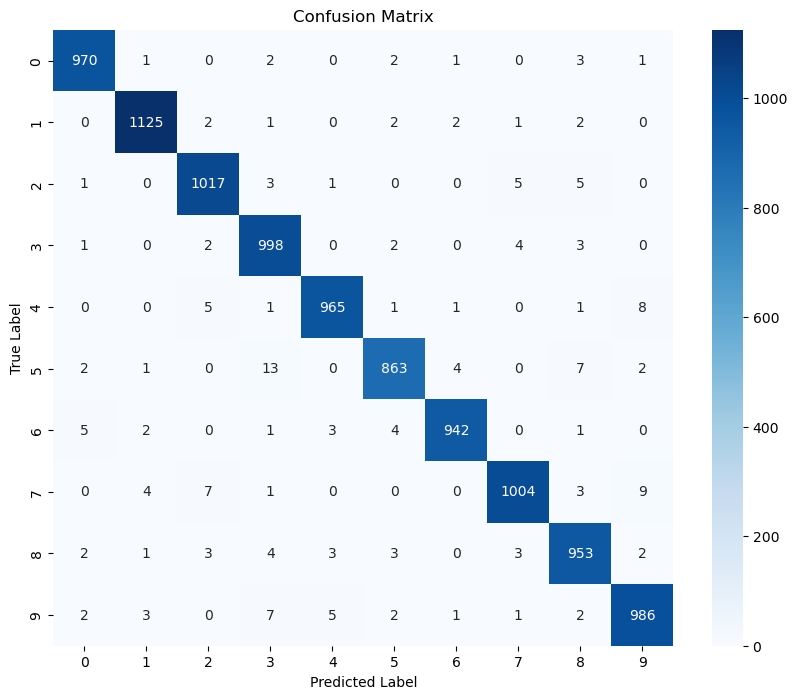

In [7]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Visualisasi Hasil

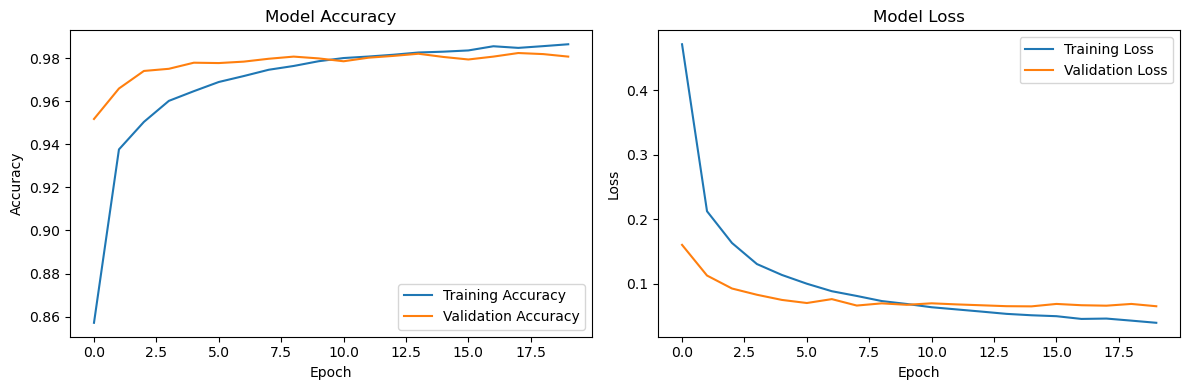

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()